In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


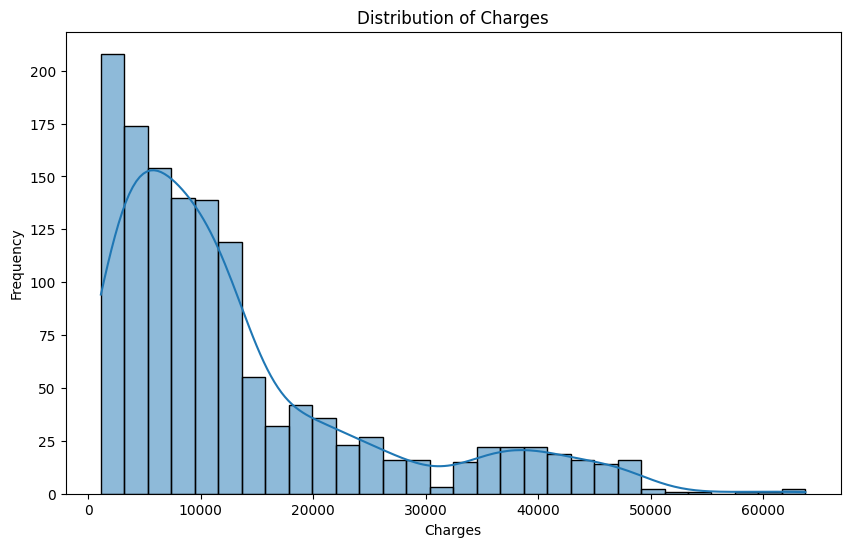

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

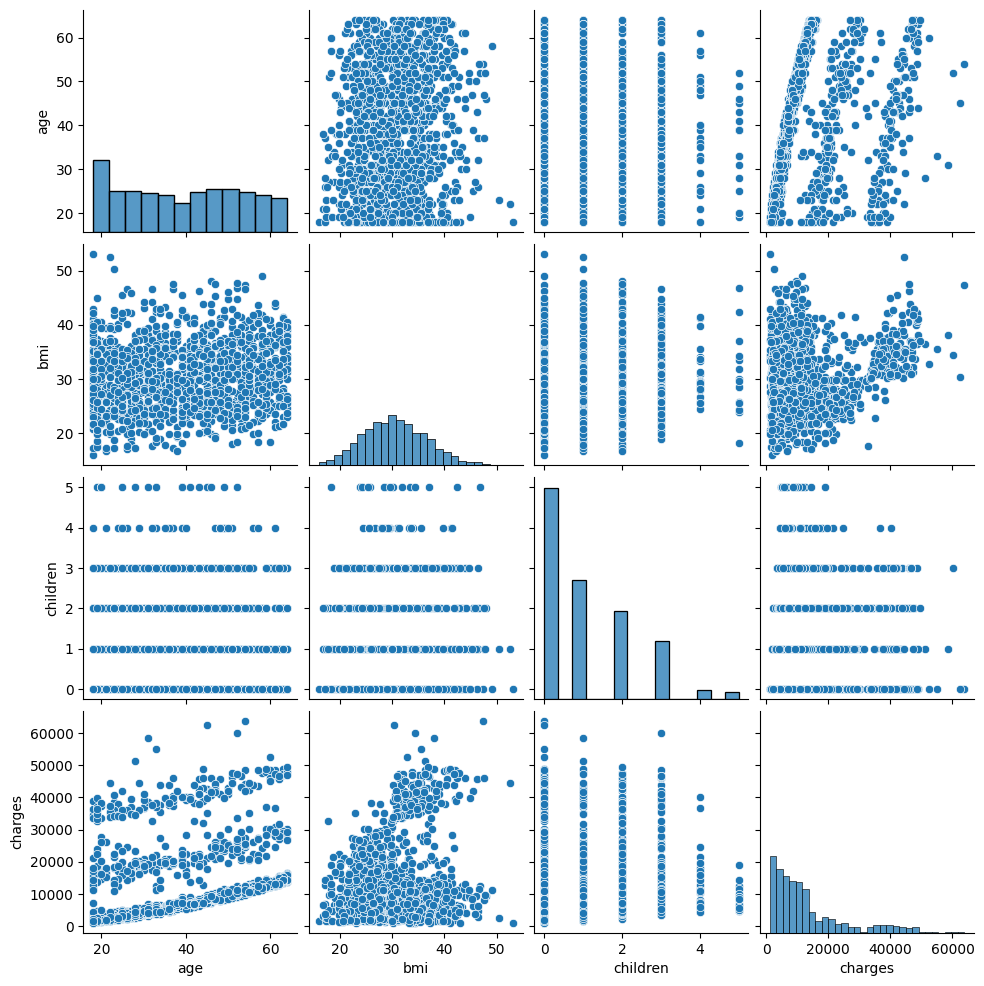

In [7]:
sns.pairplot(data)
plt.show()

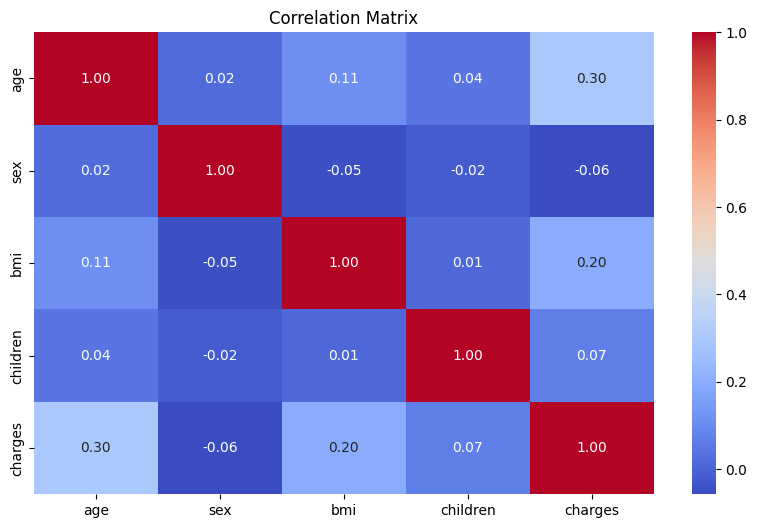

In [15]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_cols].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

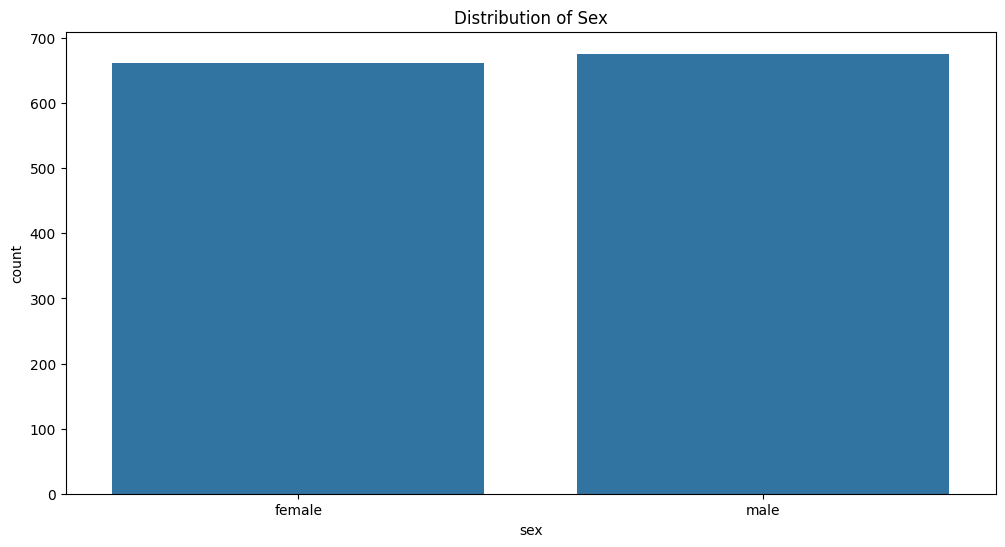

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='sex', data=data)
plt.title('Distribution of Sex')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='smoker', data=data)
plt.title('Distribution of Smokers')
plt.show()

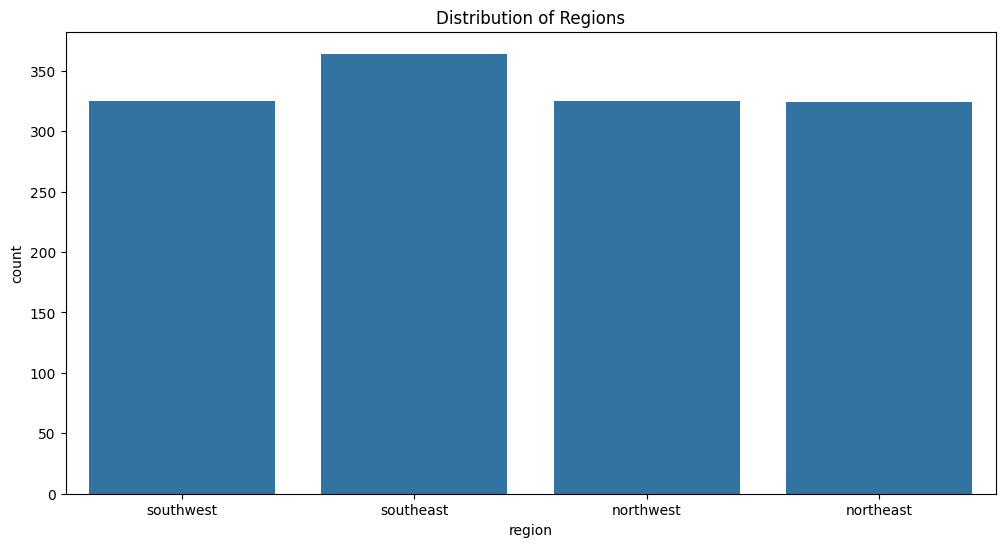

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=data)
plt.title('Distribution of Regions')
plt.show()

In [17]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [18]:
X = data.drop('charges', axis=1)
y = data['charges']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()

In [22]:
m.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
y_pred_train = m.predict(X_train_scaled)
y_pred_test = m.predict(X_test_scaled)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Training R^2 Score:', r2_score(y_train, y_pred_train))
print('Testing R^2 Score:', r2_score(y_test, y_pred_test))

Training RMSE: 6105.545160099847
Testing RMSE: 5796.284659276275
Training R^2 Score: 0.7417255854683333
Testing R^2 Score: 0.7835929767120722
